Core points:
  (1, 1)
  (1, 2)
  (5, 7)
  (3, 1)
  (3, 3)
  (6, 6)
  (7, 6)
  (2, 2)
  (8, 6)
  (8, 7)
  (9, 6)

Border points:
  (4, 3)
  (4, 7)

Noise points:
  (18, 4)
  (18, 3)

Number of clusters discovered: 2

Cluster 1:
  (1, 1)
  (1, 2)
  (3, 1)
  (3, 3)
  (4, 3)
  (2, 2)

Cluster 2:
  (5, 7)
  (6, 6)
  (7, 6)
  (4, 7)
  (8, 6)
  (8, 7)
  (9, 6)


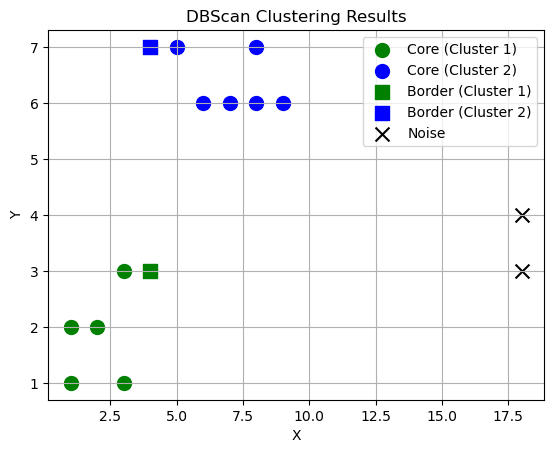

In [12]:
import matplotlib.pyplot as plt

def manhattan_distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def get_neighbors(points, point_idx, epsilon):
    return [i for i in range(len(points)) if manhattan_distance(points[point_idx], points[i]) <= epsilon]

def dbscan(points, epsilon, min_points):
    labels = [0] * len(points)  # 0: unvisited, 1: core, 2: border, -1: noise
    cluster_id = 0

    for i in range(len(points)):
        if labels[i] != 0:
            continue

        neighbors = get_neighbors(points, i, epsilon)

        if len(neighbors) < min_points:
            labels[i] = -1 
        else:
            cluster_id += 1
            labels[i] = cluster_id
            stack = neighbors.copy()

            while stack:
                neighbor = stack.pop()
                if labels[neighbor] == -1:
                    labels[neighbor] = cluster_id 
                elif labels[neighbor] == 0:
                    labels[neighbor] = cluster_id 
                    new_neighbors = get_neighbors(points, neighbor, epsilon)
                    if len(new_neighbors) >= min_points:
                        stack.extend(new_neighbors)

    return labels, cluster_id

points = [
    (1,1), (1,2), (5,7), (3,1), (3,3), (6,6), (18,4), (18,3),
    (7,6), (4,3), (4,7), (2,2), (8,6), (8,7), (9,6)
]

epsilon = 2
min_points = 3

labels, num_clusters = dbscan(points, epsilon, min_points)

core_points = [p for i, p in enumerate(points) if labels[i] > 0 and sum(1 for j in get_neighbors(points, i, epsilon) if labels[j] > 0) >= min_points]
border_points = [p for i, p in enumerate(points) if labels[i] > 0 and p not in core_points]
noise_points = [p for i, p in enumerate(points) if labels[i] == -1]

print("Core points:")
for point in core_points:
    print(f"  {point}")

print("\nBorder points:")
for point in border_points:
    print(f"  {point}")

print("\nNoise points:")
for point in noise_points:
    print(f"  {point}")

print(f"\nNumber of clusters discovered: {num_clusters}")

# Print clusters
for i in range(1, num_clusters + 1):
    print(f"\nCluster {i}:")
    cluster_points = [p for j, p in enumerate(points) if labels[j] == i]
    for point in cluster_points:
        print(f"  {point}")

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for i, point in enumerate(core_points):
    plt.scatter(point[0], point[1], c=colors[labels[points.index(point)] % len(colors)], marker='o', s=100, label=f'Core (Cluster {labels[points.index(point)]})')

for i, point in enumerate(border_points):
    plt.scatter(point[0], point[1], c=colors[labels[points.index(point)] % len(colors)], marker='s', s=100, label=f'Border (Cluster {labels[points.index(point)]})')

for i, point in enumerate(noise_points):
    plt.scatter(point[0], point[1], c='k', marker='x', s=100, label='Noise')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')

plt.title('DBScan Clustering Results')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()